Ex 3: Transparency in AI Decision-Making

Objective: To compare transparent vs. black-box models.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

df = kagglehub.dataset_download("rohit265/loan-approval-dataset")
print("Path to dataset files:", df)

Path to dataset files: /kaggle/input/loan-approval-dataset


In [ ]:
import os
loan_data_path = os.path.join(df, 'loan_approval_dataset.json')
loan_data_df = pd.read_json(loan_data_path)
print(loan_data_df.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


In [ ]:
for col in loan_data_df.columns:
    if loan_data_df[col].dtype == 'object':
        loan_data_df[col].fillna(loan_data_df[col].mode()[0], inplace=True)
    else:
        loan_data_df[col].fillna(loan_data_df[col].median(), inplace=True)


/tmp/ipython-input-416302197.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_df[col].fillna(loan_data_df[col].median(), inplace=True)
/tmp/ipython-input-416302197.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
loan_data_df = pd.get_dummies(loan_data_df, drop_first=True)


In [ ]:
print(loan_data_df.columns)
X = loan_data_df.drop('Risk_Flag', axis=1)
y = loan_data_df['Risk_Flag']

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Married/Single_single',
       'House_Ownership_owned', 'House_Ownership_rented',
       ...
       'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim', 'STATE_Tamil_Nadu',
       'STATE_Telangana', 'STATE_Tripura', 'STATE_Uttar_Pradesh',
       'STATE_Uttar_Pradesh[5]', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=405)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

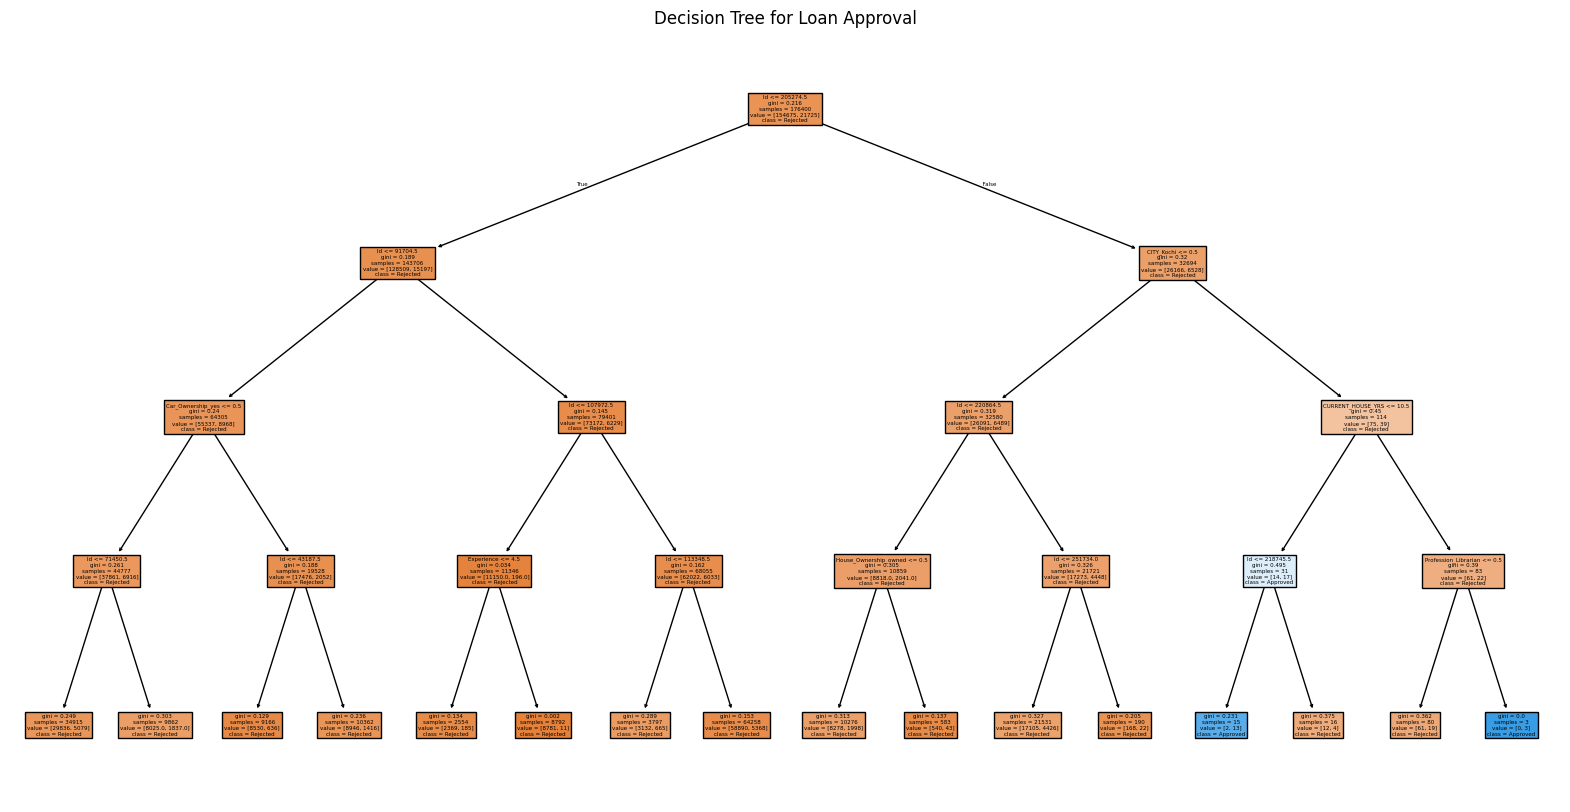

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Rejected', 'Approved'], filled=True)
plt.title("Decision Tree for Loan Approval")
plt.show()


```
Blue nodes → Mostly "Approved" loans.
A loan is approved when:

Path 1:
ID <= 218815.0
CURRENT_HOUSE_YES <= 1.0
ID <= 218165.0
This leads to Approved (small group).

Path 2:
ID > 218815.0
CURRENT_HOUSE_YES <= 1.0
Profession_Lawyer <= 0.5
This also leads to Approved.
```







```
Orange nodes → Mostly "Rejected" loans.

Loan Rejected (Orange Nodes)
A loan is rejected when conditions don’t match the approval paths above, for example:

ID <= 118013.0 and Car_Ownership_Yes <= 0.5 → Rejected

CITY_... <= 0.5 and House_Ownership_Owned <= 0.5 → Rejected

Expenses <= 4.5 but not meeting approval branch → Rejected

Many branches end with almost 100% rejection.
```



In [ ]:
# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Decision Tree Accuracy: 0.8773544973544973
Random Forest Accuracy: 0.9015343915343915


In [ ]:
# Classification Reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     66329
           1       0.63      0.46      0.54      9271

    accuracy                           0.90     75600
   macro avg       0.78      0.71      0.74     75600
weighted avg       0.89      0.90      0.89     75600



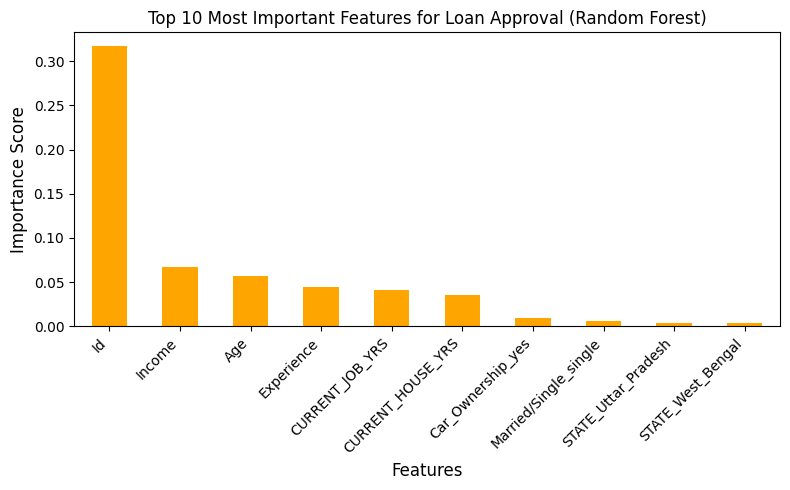

In [ ]:

sorted_importances = importances.sort_values(ascending=False)

top_n = 10

ax = sorted_importances.head(top_n).plot(
    kind='bar',
    figsize=(8, 5),
    color='orange',
    title=f"Top {top_n} Most Important Features for Loan Approval (Random Forest)"
)

ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Importance Score", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


*   The Decision Tree overfits to the majority class (rejections) and fails to recognize the minority class (approvals).
*   Random Forest, by combining many trees, learns more balanced decision rules, so it can detect approvals better than a single tree — but still struggles because of class imbalance.

